In [1]:
!wget https://www.dropbox.com/s/lkttph5qdkxwedk/310_23498_bundle_archive.zip?dl=0

--2020-08-15 09:15:57--  https://www.dropbox.com/s/lkttph5qdkxwedk/310_23498_bundle_archive.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/lkttph5qdkxwedk/310_23498_bundle_archive.zip [following]
--2020-08-15 09:15:58--  https://www.dropbox.com/s/raw/lkttph5qdkxwedk/310_23498_bundle_archive.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc29f4dddc3796ef1d0609c5b761.dl.dropboxusercontent.com/cd/0/inline/A9dMqS8tmkuLq8EbemFBZFkaZ4ZpSSonJOfZHSRaJeaoCUrYD6zoquAfzrV9iLXQNmuDbmPRJ3jSpHyBgXnkfL3bDuVnNN2kjENpYf9zMZXdBo8LzyJBD9LGEG9GbbW5EoM/file# [following]
--2020-08-15 09:15:58--  https://uc29f4dddc3796ef1d0609c5b761.dl.dropboxusercontent.com/cd/0/inline/A9dMqS8tmkuLq8EbemFBZFkaZ4ZpSSonJOfZHSRaJeaoCUrYD6zoquAfzr

In [2]:
!unzip '310_23498_bundle_archive.zip?dl=0' -d "data/"

Archive:  310_23498_bundle_archive.zip?dl=0
  inflating: data/creditcard.csv     


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('/content/data/creditcard.csv')

In [5]:
print(df.head())

   Time        V1        V2        V3  ...       V27       V28  Amount  Class
0   0.0 -1.359807 -0.072781  2.536347  ...  0.133558 -0.021053  149.62      0
1   0.0  1.191857  0.266151  0.166480  ... -0.008983  0.014724    2.69      0
2   1.0 -1.358354 -1.340163  1.773209  ... -0.055353 -0.059752  378.66      0
3   1.0 -0.966272 -0.185226  1.792993  ...  0.062723  0.061458  123.50      0
4   2.0 -1.158233  0.877737  1.548718  ...  0.219422  0.215153   69.99      0

[5 rows x 31 columns]


In [9]:
cols=df.columns
print(cols)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [18]:
X=df[cols[:-1]]
Y=df[cols[-1]]

In [16]:
print(X.shape,Y.shape)

(284807, 30) (284807,)


In [22]:
# Exploratory Data Analysis : 
# lets see how the data is distributed 

In [46]:
frequency_counts=Y.value_counts()
fraud=frequency_counts[1]
Normal=frequency_counts[0]
print(fraud,Normal)

492 284315


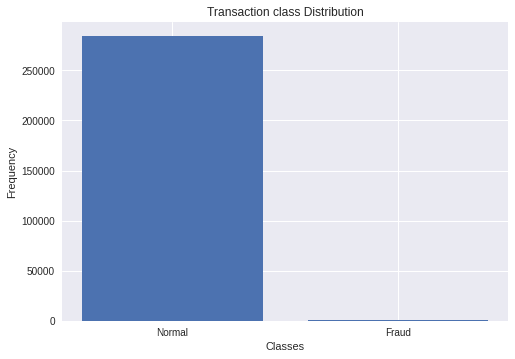

In [47]:
classes=[1,0]
Labels=["Normal","Fraud"]
frequency=[fraud,Normal]
plt.style.use('seaborn')
plt.title('Transaction class Distribution')
plt.bar(classes,frequency)
plt.xticks(range(2),Labels)
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.show()

In [49]:
# seperate the dataset on the basis of their classes :
fraud=df[df['Class']==1]
Normal=df[df['Class']==0]

In [50]:
print(fraud.shape,Normal.shape)

(492, 31) (284315, 31)


In [52]:
from imblearn.under_sampling import NearMiss

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [64]:
ns=NearMiss(random_state=78)
X_res,Y_res=ns.fit_sample(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [65]:
print(X_res.shape,Y_res.shape)

(984, 30) (984,)


In [69]:
# so now data is balanced 
#print(Y_res.value_counts())
import numpy as np
print(type(Y_res))

<class 'numpy.ndarray'>


In [70]:
print(np.unique(Y_res,return_counts=True))

(array([0, 1]), array([492, 492]))


In [ ]:
# cool! data is now balanced .This Process is called Under Sampling